<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [8]:
data = pd.read_csv('DMV_Written_Tests.csv')
print(data.head())

   DMV_Test_1  DMV_Test_2  Results
0   34.623660   78.024693        0
1   30.286711   43.894998        0
2   35.847409   72.902198        0
3   60.182599   86.308552        1
4   79.032736   75.344376        1


### Task 3: Visualize the Data
---

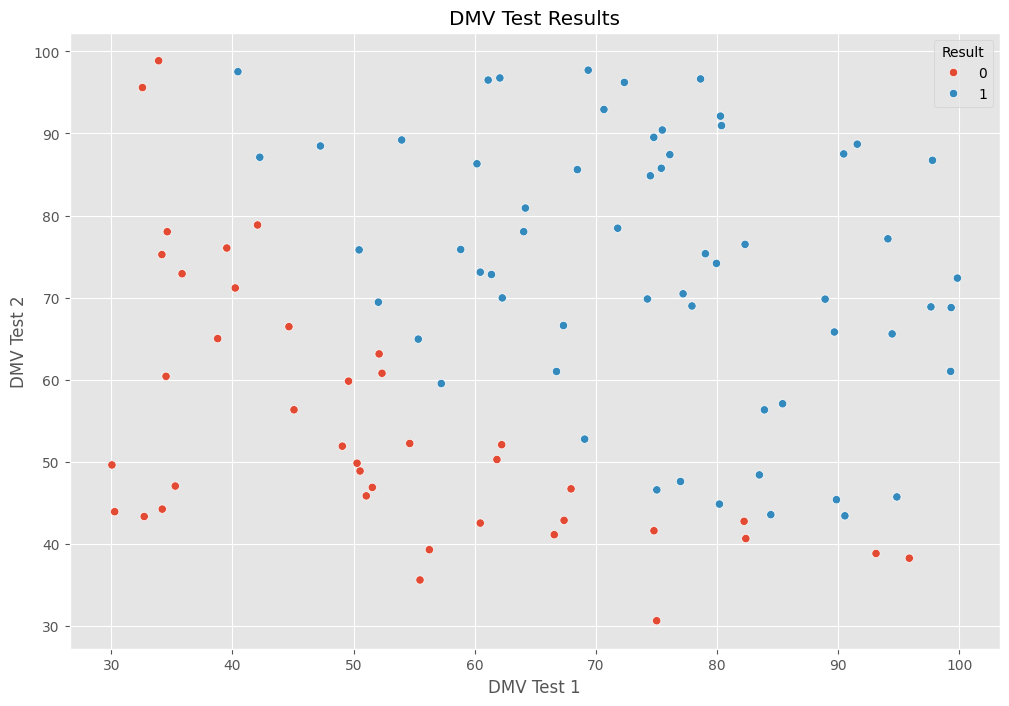

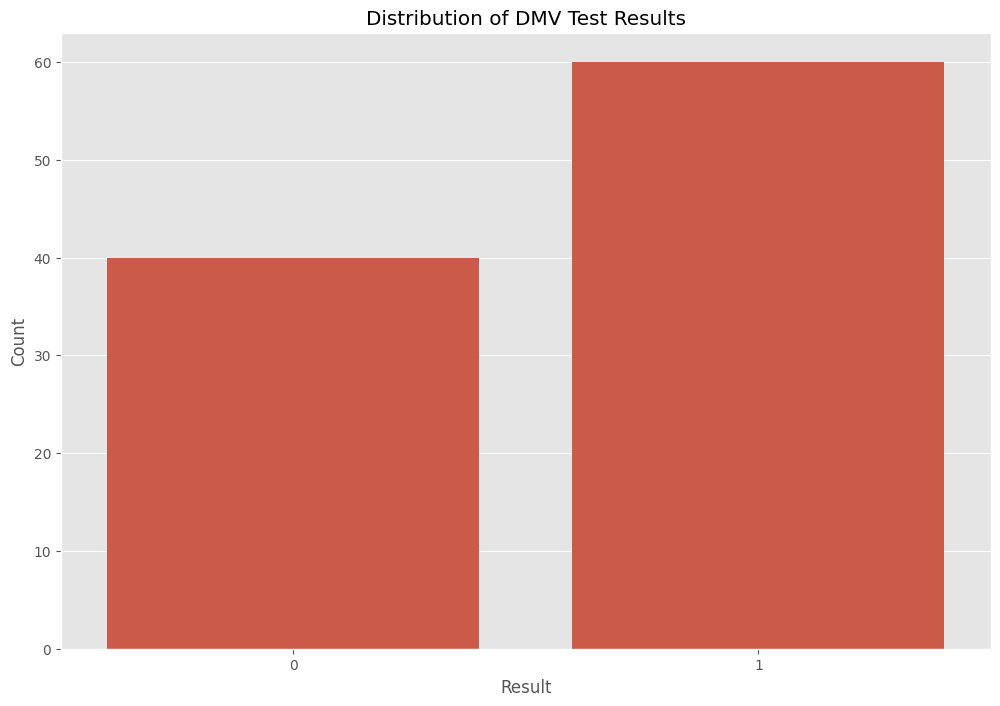

In [11]:
sns.scatterplot(x='DMV_Test_1', y='DMV_Test_2', hue='Results', data=data)
plt.xlabel('DMV Test 1')
plt.ylabel('DMV Test 2')
plt.title('DMV Test Results')
plt.legend(title='Result')
plt.show()
sns.countplot(x='Results', data=data)
plt.title('Distribution of DMV Test Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [39]:
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-6  # Small value to prevent log(0)
    cost = (1 / m) * np.sum(-y * np.log(h + epsilon) - (1 - y) * np.log(1 - h + epsilon))
    gradient = (1 / m) * (X.T @ (h - y))
    return cost, gradient

### Task 6: Cost and Gradient at Initialization
---

In [40]:
X = data[['DMV_Test_1', 'DMV_Test_2']].values
y = data['Results'].values

X = np.insert(X, 0, 1, axis=1)

theta = np.zeros(X.shape[1])

initial_cost, initial_gradient = cost_function(theta, X, y)

print("Initial Cost:", initial_cost)
print("Initial Gradient:", initial_gradient)

Initial Cost: 0.6931451805619452
Initial Gradient: [ -0.1        -12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [41]:
def gradient_descent(theta, X, y, alpha, iterations):
    costs = []
    for _ in range(iterations):
        cost, gradient = cost_function(theta, X, y)
        theta -= alpha * gradient
        costs.append(cost)
    return theta, costs


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

In [42]:
alpha = 0.1
iterations = 2000

optimized_theta, costs = gradient_descent(theta.copy(), X, y, alpha, iterations)

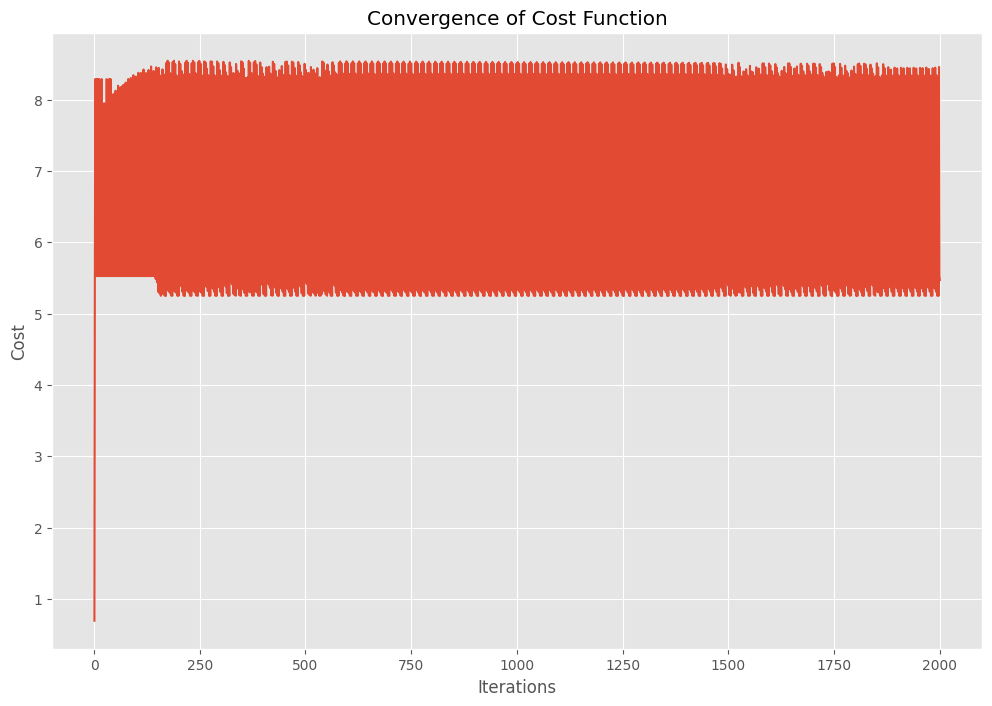

In [43]:
plt.plot(range(1, iterations + 1), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence of Cost Function')
plt.show()

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

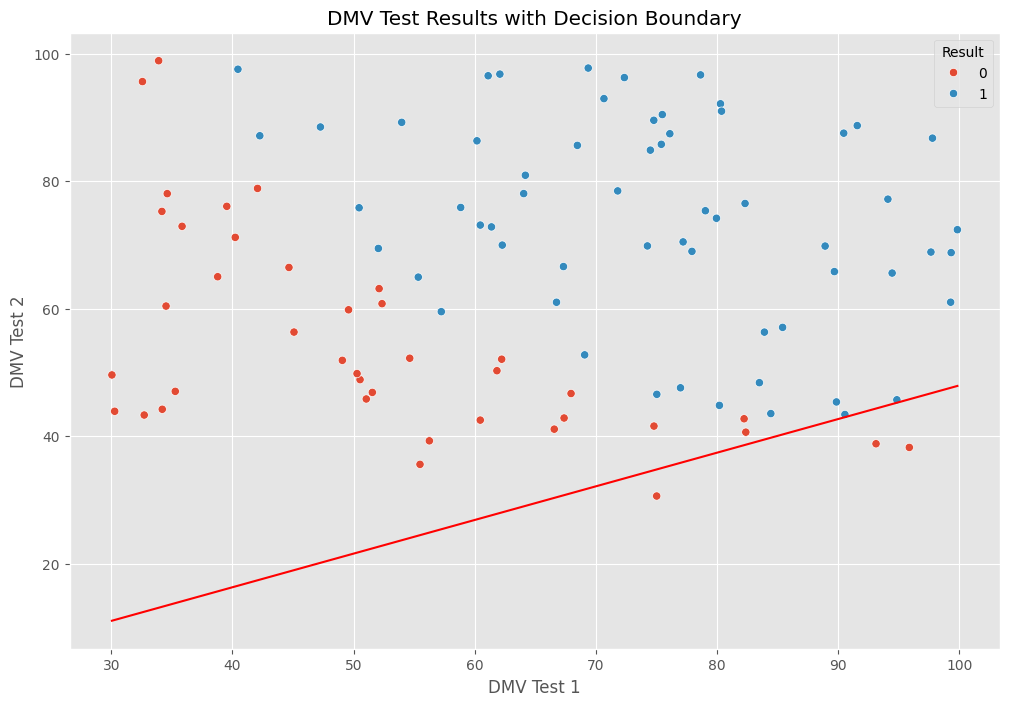

In [44]:
x_values = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_values = -(optimized_theta[0] + optimized_theta[1] * x_values) / optimized_theta[2]

sns.scatterplot(x='DMV_Test_1', y='DMV_Test_2', hue='Results', data=data)
plt.plot(x_values, y_values, color='red')
plt.xlabel('DMV Test 1')
plt.ylabel('DMV Test 2')
plt.title('DMV Test Results with Decision Boundary')
plt.legend(title='Result')
plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [45]:
def predict(theta, X):
    return (sigmoid(X @ theta) >= 0.5).astype(int)